In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import tensor

In [4]:
plt.rcParams["font.size"] = 16

def plot_gradient(x, y, slope):
    for line in ax.get_lines():
        line.set_color("black")
        line.set_linewidth(1)
    ax.set_title("slope=%.2f" % slope)
    x, y, slope = map(float, (x, y, slope))
    dx = 0.5
    dy = dx*slope
    plt.plot([x-dx/2, x+dx/2], [y-dy/2, y+dy/2], linewidth=4, color="r")
    plt.scatter(x, y, s=100, c="k")

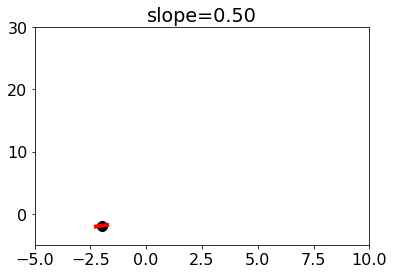

In [19]:
def f(x):
    if x > -2:
        return (x+2.5) ** 2 - 2
    else:
        return (x+2.5) ** 4 - 2

fig,ax = plt.subplots()
ax.set_xlim(-5, 10)
ax.set_ylim(-5, 30)

def try_x(values):
    for x in values:
        x = tensor(float(x)).requires_grad_()
        y = f(x)
        y.backward()
        plot_gradient(x,y,x.grad)

try_x([-2]) # TODO: add guesses to list, one at a time!

-0.999999988079071 -1.9999999999999996


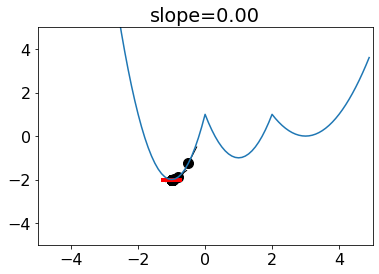

In [27]:
def f(x):
    if x < 0:
        return ((x - -1) ** 2) * 3 - 2
    if x > 2:
        return (x - 3) ** 2
    else:
        return ((x - 1) ** 2) * 2 - 1

def try_x(x):
    x = tensor(float(x)).requires_grad_()
    y = f(x)
    y.backward()
    plot_gradient(x, y, x.grad)
    return float(x.grad)

fig,ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

x = -0.5 # TODO: try different starting values for x
learning_rate = 0.1

for i in range(40):
    grad = try_x(x)
    x -= grad * learning_rate
    
print(x, f(x))
ax.plot(np.arange(-5,5,0.1), [f(x) for x in np.arange(-5,5,0.1)])

tensor([-1.9907, 19.8596], dtype=torch.float64, requires_grad=True)

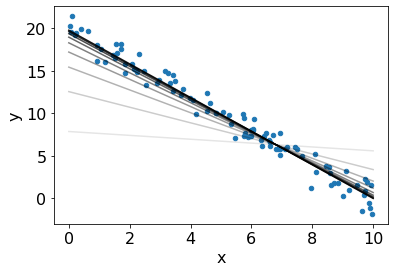

In [31]:
x = np.random.uniform(0, 10, size=100)
noise = np.random.normal(size=x.size)
y = 20 - 2*x + noise
df = pd.DataFrame({
    "x": x,
    "ones": np.ones(x.size),
    "y": y,
})

ax = df.plot.scatter(x="x", y="y")

A = tensor(df[["x", "ones"]].values, dtype=float)
y = tensor(df[["y"]].values, dtype=float)

def mse(coef):
    y_predicted = A @ coef.reshape(-1,1)
    return ((y_predicted - y) ** 2).mean()

# coef = [slope, intercept]
coef = tensor([0.0, 0.0], dtype=float).requires_grad_()

learning_rate = 0.01
for i in range(1000):
    err = mse(coef) # mean squared error
    err.backward()
    coef.data -= coef.grad * learning_rate
    coef.grad.zero_()
    if i % 100 == 0:
        slope = float(coef[0])
        intercept = float(coef[1])
        x0, x1 = 0, 10
        ax.plot([x0, x1], [x0*slope+intercept, x1*slope+intercept], "k", alpha=i/1000)

coef